<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/6_1_Perceptron_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6강 선형 판별 함수
기존 베이지안 분류 스타일은 클래스별 평균과 공분산으로 결정 경계를 추출했고, K근접이웃 분류는 각데이터마다 비교하여 근접 계수를 정해서 결정을 정하였다.
 - 베이지안: 평균과 공분산을 이용한 결정함수
 - K근접: k량의 데이터 중 가장많이 속해있는 클래스에 할당

6강 최소제곱법이나 퍼셉트론은 임의?에 결정경계를 만들고 각데이터마다 그결정경계의 분류 오차가 최소화되는 결정 경계를 찾아가는 방법을 이용한다. 
 - 최소제곱 분류: 정리필요
 - 퍼셉트론 분류: 입력 차원과 출력차원을 설정하고, 두개가 연결되어 있는 파라미터값을 모든각각의 데이터와 비교하면서 조정하여 결정경계 수정


###교제 코드 예제 퍼셉트론 분류


In [ ]:
#사용할 패키지 불러오기
import numpy as np
import numpy.matlib

In [ ]:
#퍼셉트론 분류기에 사용할 임의의 클래스 생성 및 병합
class_size = 10
train_class1 = np.random.randn(class_size,2)
train_class2 = np.random.randn(class_size,2) + np.matlib.repmat([2.5,2.5],class_size, 1) #가우시안 난수열에 2.5,2.5 평균을 더해주어 클래스1하고 벌려준다
train = np.vstack([train_class1,train_class2]) #병합

train_class1.shape, train_class2.shape, train.shape

((10, 2), (10, 2), (20, 2))

In [ ]:
#트레인라벨(아웃풋 혹은 목표) 설정
train_label = np.zeros([train.shape[0],1]) #입력 포멧 생성
train_label[0:10,[0]] = np.zeros([class_size,1]) #슬라이싱하면 배열 포멧이 리스트형식으로 바뀌어 0에 대괄호를 붙여 (10,1)로 만든다.
train_label[10:20,[0]] = np.zeros([class_size,1])+1 


unique, count = np.unique(train_label, return_counts=True)
info = dict(zip(unique,count))
info, np.info(train_label)

class:  ndarray
shape:  (20, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x55b6b1530460
byteorder:  little
byteswap:  False
type: float64


({0.0: 10, 1.0: 10}, None)

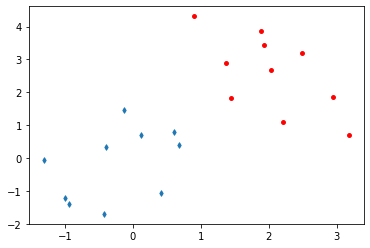

In [ ]:
# 클래스 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(train[0:class_size,0], train[0:class_size,1], s = 15, marker ='d')
plt.scatter(train[class_size:class_size*2,0], train[class_size:class_size*2,1], s = 15, marker='o', color = 'r')
plt.show()

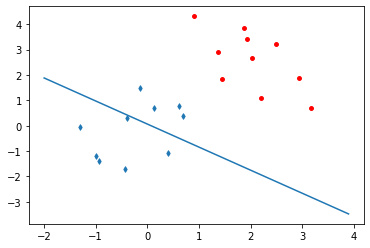

In [ ]:
#퍼셉트론 분류기

##기본 설정
corect_step = 5 #오차교정 반복 횟수
input_dim = 2 #입력값 차원 개수 (여기서는 x, y 좌표 2차원 데이터.. 맞나요..?) 
output_dim = 1 #출력 차원 개수 (여기서는 클래스값 1개)

'''다음 w = np.random.rand(2,1)*0.4-0.2 이해가 가지 않음
  1. 왜 2차원 백터를 만드는지 (초기 판별함수 설정할때 백터내 두번째 인자로 나누기를 하는데
  2.  0.4, -0.2는 무슨 근거로 정했을지'''
w = np.random.rand(2,1)*0.4-0.2 #직선형 함수 기울기 파라미터 설정 
wo = np.random.rand(1,1)*0.4-0.2 #직선형 함수 상수항

##초기 그려보기
import math
train_minX, train_maxX = np.min(train[:,0], 0), np.max(train[:,0],0) #난수로 만들어진 클래스의 좌표x의 범위 설정을 위해 최소값 최대값 생성 (함수의 길이)
x_values = np.arange(math.floor(train_minX), math.ceil(train_maxX), 0.1)
 #math.floor(train_minX), math.ceil(train_maxX), np.info(range_x)

plt.scatter(train[0:class_size,0], train[0:class_size,1], s = 15, marker ='d')
plt.scatter(train[class_size:class_size*2,0], train[class_size:class_size*2,1], s = 15, marker='o', color = 'r')
plt.plot(x_values, ((-w[0,0]*x_values-wo)/w[1,0]).T) #x값은 (60,) 배열 y는 (1,60) 이야서 y 전치해 줌
plt.show()

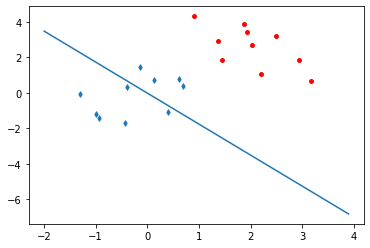

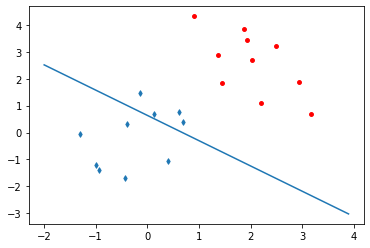

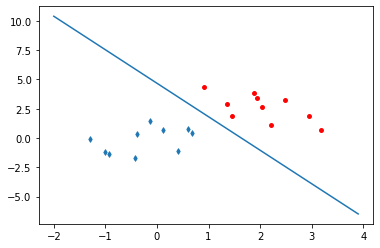

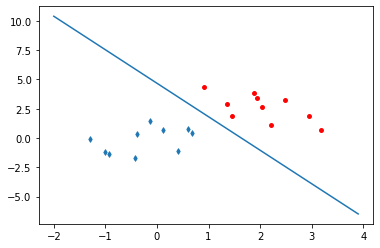

In [ ]:
#오류를 계산하면서 기울기 w값과 상수 wo값을 학습률에 따라 갱신 하고 그리기

eta=0.5 #학습률 저장

for j in range(1,corect_step): #오차 교정 갱신을 진행할 횟수 
  for i in range(0, train.shape[0]): #각각의 전체 input에 대하여 클래스 검증
    x_value, x_label = train[i,:], train_label[i,0] #하나의 데이터와 매칭되는 클래스 추출
    if(x_value@w+wo>0): y_value = 1 #선형판별함수식에 따른 y값(라벨, 클래스) 결정
    else: y_value = 0
    error = x_label - y_value #주어진라벨값(목표값)과 선형판별함수 y값으로 클래스 오차 값추출
    Error = np.empty([0,1]) 
    Error = np.vstack([Error, error])
    delta_w = np.reshape(eta*error*x_value.T, (2,1)) #학습률을 적용하여 얼마만큼 기울기를 조정할지 결정 (에러 x X좌표)
    delta_wo = eta*error*1 
    w = w + delta_w #조정값을 통하여 갱신된 기울기 설정
    wo = wo + delta_wo 
  plt.scatter(train[0:class_size,0], train[0:class_size,1], s = 15, marker ='d')
  plt.scatter(train[class_size:class_size*2,0], train[class_size:class_size*2,1], s = 15, marker='o', color = 'r')
  plt.plot(x_values, ((-w[0,0]*x_values-wo)/w[1,0]).T)
  plt.show()